# Importing Libraries

In [3]:
#basic Libraries
import numpy as np
import pandas as pd
import warnings
import scipy

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Libraries set up
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')


#NLP
from bs4 import BeautifulSoup 
import re
from nltk.corpus import stopwords
import spacy
from nltk.tokenize import RegexpTokenizer
import nltk

#Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE as RFE
from sklearn.metrics import r2_score

# 1. Loading the dataset

In [4]:
df = pd.read_csv("spotify_dataset.csv", encoding='ISO-8859-1')

#got an error (UnicodeDecodeError: "utf-8") when loading the dataset for the 1st time. 
#The UnicodeDecodeError: ‘utf-8’ codec can’t decode bytes in position 0-1: invalid continuation byte error 
#is a common error that occurs when trying to read a file with Pandas that contains non-UTF-8 encoded characters. 
#UTF-8 is a character encoding standard that’s widely used for text files, but it’s not the only encoding format out there. 
#If you try to read a file with a different encoding format, you may encounter this error.

# 2. Initial exploration

In [152]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [153]:
df.shape

(952, 24)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            952 non-null    object 
 1   artist(s)_name        952 non-null    object 
 2   artist_count          952 non-null    int64  
 3   released_year         952 non-null    int64  
 4   released_month        952 non-null    int64  
 5   released_day          952 non-null    int64  
 6   in_spotify_playlists  952 non-null    int64  
 7   in_spotify_charts     952 non-null    int64  
 8   streams               952 non-null    int64  
 9   in_apple_playlists    952 non-null    int64  
 10  in_apple_charts       952 non-null    int64  
 11  in_deezer_playlists   952 non-null    int64  
 12  in_deezer_charts      952 non-null    int64  
 13  in_shazam_charts      902 non-null    float64
 14  bpm                   952 non-null    int64  
 15  key                   8

In [5]:
conditions = [    
    (df["released_month"] > 11) | (df["released_month"] <= 3),
    (df["released_month"] == 4) | (df["released_month"] == 5),
    (df["released_month"] >= 6) | (df["released_month"] <= 9),
    (df["released_month"] == 10) | (df["released_month"] == 11)
]

# create a list of the values we want to assign for each condition
values = ['Winter', 'Spring', 'Summer', 'Fall']
    
# create a new column and use np.select to assign values to it using our lists as arguments
df['released_season'] = np.select(conditions, values)

In [156]:
df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_season
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Summer
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,Winter
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,Summer
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,Summer
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,Spring
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,C#,Major,92,66,58,19,0,8,24,Summer
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,F,Minor,67,83,76,48,0,8,3,Winter
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,F,Major,67,26,71,37,0,11,4,Summer
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,C#,Minor,85,22,62,12,0,28,9,Spring
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,D,Minor,81,56,48,21,0,8,33,Winter


# NLP

In [6]:
#Cleaning artists name

def name_to_words(raw_name):
    '''
    Function to convert an artist name to a string of words
    The input is a single string , and 
    the output is a single string (a cleaned artist name)
    '''
 
    name_text = BeautifulSoup(raw_name).get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", name_text)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_words = [w for w in words if not w in stops]
    return (" ".join(meaningful_words))

In [7]:
df['clean_name'] = df['artist(s)_name'].apply(name_to_words)

In [8]:
df[['artist(s)_name','clean_name']]

,artist(s)_name,clean_name
0,"Latto, Jung Kook",latto jung kook
1,Myke Towers,myke towers
2,Olivia Rodrigo,olivia rodrigo
3,Taylor Swift,taylor swift
4,Bad Bunny,bad bunny
...,...,...
947,Selena Gomez,selena gomez
948,Taylor Swift,taylor swift
949,"Feid, Paulo Londra",feid paulo londra
950,"Feid, Sech, Jhayco",feid sech jhayco


In [9]:
nlp = spacy.load('en_core_web_sm')

In [10]:
# Function to add NLP features to the dataframe
def add_nlp_features(text):
    doc = nlp(text)
    features = {
        'LENGTH': len(text),
        'TOKENS': [token.text for token in doc],
        'POS': [token.pos_ for token in doc],
        'ENTITIES': [(ent.text, ent.label_) for ent in doc.ents],
    }
    return pd.Series(features)

In [11]:
# Apply the function to the "clean_name" column and add the resulting features as new columns

nlp_features = df['clean_name'].apply(add_nlp_features)

df = pd.concat([df, nlp_features], axis=1)

In [12]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_season,clean_name,LENGTH,TOKENS,POS,ENTITIES
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,31,0,8,4,Summer,latto jung kook,15,"[latto, jung, kook]","[PROPN, PROPN, PROPN]","[(latto jung kook, PERSON)]"
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,7,0,10,4,Winter,myke towers,11,"[myke, towers]","[NOUN, NOUN]",[]
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,17,0,31,6,Summer,olivia rodrigo,14,"[olivia, rodrigo]","[PROPN, PROPN]",[]
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,11,0,11,15,Summer,taylor swift,12,"[taylor, swift]","[PROPN, NOUN]","[(taylor, PERSON)]"
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,14,63,11,6,Spring,bad bunny,9,"[bad, bunny]","[ADJ, NOUN]","[(bad bunny, PERSON)]"


In [13]:
df.shape

(952, 30)

In [165]:
# 2nd approach: using TFID Vectorizer to extract features

# Initialize the TfidfVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf_vectorizer = TfidfVectorizer()


In [166]:
# Fit and transform the text data
#tfidf_features = tfidf_vectorizer.fit_transform(df['clean_name'])

In [167]:
# Add TF-IDF features as new columns in the original dataframe
#for i, feature in enumerate(tfidf_vectorizer.get_feature_names_out()):
    #df[f'TFIDF_{feature}'] = tfidf_features[:, i].toarray()

In [168]:
##df.shape

# 3. Data cleaning and imputation

In [14]:
#Dropping columns not needed for this analysis

df.drop(["track_name", "artist(s)_name", "released_year", "released_month", "released_day", "clean_name"], axis=1, inplace=True)

In [245]:
df.shape

(952, 24)

In [246]:
# Checking for null values, we found some missing values in 2 columns.
#"in_shazam_charts" has 50/952 = 5% missing values and "key" has 10% missing values.
df.isnull().sum()

artist_count             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
released_season          0
LENGTH                   0
TOKENS                   0
POS                      0
ENTITIES                 0
dtype: int64

In [15]:
#Handling missing values
#We can fill "in_shazam_charts" column with the AVG of in_spotify_charts, in_apple_charts and in_deezer_charts

#mean_charts = sum(df[["in_spotify_charts", "in_apple_charts", "in_deezer_charts"]].mean())/3
##print(mean_charts)

# fill NaN values with the mean of each column
#df["in_shazam_charts"].fillna(mean_charts, inplace=True)

#We decide to drop the key and the shazam_charts columns because they both have more that 5% of total missing. And in the case of Shazam charts, Shazam was acquired by Apple in 2018, 
#so this variable is not going to add much different information than the Apple related variables.

df.drop("key", axis=1, inplace=True)
df.drop("in_shazam_charts", axis=1, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   artist_count          952 non-null    int64 
 1   in_spotify_playlists  952 non-null    int64 
 2   in_spotify_charts     952 non-null    int64 
 3   streams               952 non-null    int64 
 4   in_apple_playlists    952 non-null    int64 
 5   in_apple_charts       952 non-null    int64 
 6   in_deezer_playlists   952 non-null    int64 
 7   in_deezer_charts      952 non-null    int64 
 8   bpm                   952 non-null    int64 
 9   mode                  952 non-null    object
 10  danceability_%        952 non-null    int64 
 11  valence_%             952 non-null    int64 
 12  energy_%              952 non-null    int64 
 13  acousticness_%        952 non-null    int64 
 14  instrumentalness_%    952 non-null    int64 
 15  liveness_%            952 non-null    in

In [248]:
df.isnull().sum()

artist_count            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
bpm                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
released_season         0
LENGTH                  0
TOKENS                  0
POS                     0
ENTITIES                0
dtype: int64

In [174]:
df.shape

(952, 22)

In [16]:
# Check for duplicates
#df.duplicated().sum()

In [19]:
print(df.corr(numeric_only=True)["streams"].sort_values(ascending=False))


streams                 1.000000
in_spotify_playlists    0.789822
in_apple_playlists      0.772063
in_deezer_playlists     0.598131
in_apple_charts         0.320234
in_spotify_charts       0.245821
in_deezer_charts        0.228598
bpm                    -0.002438
acousticness_%         -0.004485
energy_%               -0.026051
valence_%              -0.040831
instrumentalness_%     -0.044902
liveness_%             -0.048337
danceability_%         -0.105457
LENGTH                 -0.109219
speechiness_%          -0.112333
artist_count           -0.136463
Name: streams, dtype: float64


In [20]:
# dropping low correlated variables

df.drop(columns= ["bpm", "acousticness_%", "energy_%", "valence_%", "instrumentalness_%", "liveness_%"], axis=1, inplace=True)

In [21]:
df.head()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,mode,danceability_%,speechiness_%,released_season,LENGTH,TOKENS,POS,ENTITIES
0,2,553,147,141381703,43,263,45,10,Major,80,4,Summer,15,"[latto, jung, kook]","[PROPN, PROPN, PROPN]","[(latto jung kook, PERSON)]"
1,1,1474,48,133716286,48,126,58,14,Major,71,4,Winter,11,"[myke, towers]","[NOUN, NOUN]",[]
2,1,1397,113,140003974,94,207,91,14,Major,51,6,Summer,14,"[olivia, rodrigo]","[PROPN, PROPN]",[]
3,1,7858,100,800840817,116,207,125,12,Major,55,15,Summer,12,"[taylor, swift]","[PROPN, NOUN]","[(taylor, PERSON)]"
4,1,3133,50,303236322,84,133,87,15,Minor,65,6,Spring,9,"[bad, bunny]","[ADJ, NOUN]","[(bad bunny, PERSON)]"


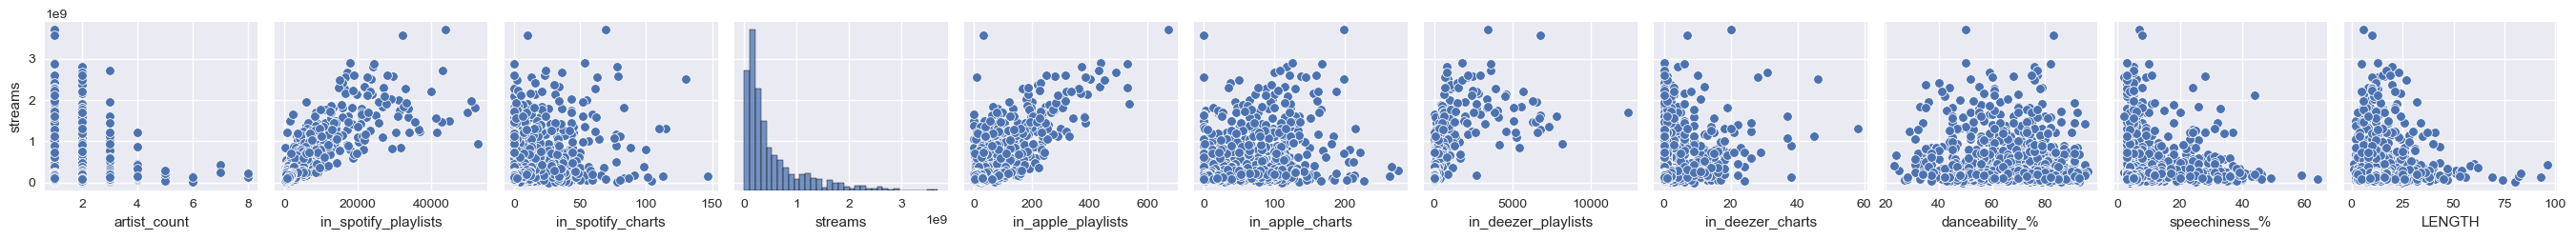

In [22]:
sns.pairplot(data = df, y_vars = 'streams')  
plt.show();

In [23]:
#We drop the Entities because it will be mainly Person

df.drop(columns= ["ENTITIES"], axis=1, inplace=True)

In [24]:
#Tokens, POS and ENtities are an array of list. We transforme it into string type and will get an unique combination of artists as a string in each row.
#We decide to do the same on the POS to represent the pattern of the grammatical pattern of the token

#list=['1','2','3','4']
#' '.join(str(e) for e in list)

def stringify_tokens(list):
    return ' '.join(str(e) for e in list)

def stringify_pos(list):
    return ' '.join(str(e) for e in list)

In [25]:
df["TOKENS"] = df["TOKENS"].apply(stringify_tokens)

In [26]:
#df["POS"] = df["POS"].apply(stringify_pos)

df.drop(columns= ["POS"], axis=1, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   artist_count          952 non-null    int64 
 1   in_spotify_playlists  952 non-null    int64 
 2   in_spotify_charts     952 non-null    int64 
 3   streams               952 non-null    int64 
 4   in_apple_playlists    952 non-null    int64 
 5   in_apple_charts       952 non-null    int64 
 6   in_deezer_playlists   952 non-null    int64 
 7   in_deezer_charts      952 non-null    int64 
 8   mode                  952 non-null    object
 9   danceability_%        952 non-null    int64 
 10  speechiness_%         952 non-null    int64 
 11  released_season       952 non-null    object
 12  LENGTH                952 non-null    int64 
 13  TOKENS                952 non-null    object
dtypes: int64(11), object(3)
memory usage: 104.3+ KB


In [261]:
df.head()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,mode,danceability_%,speechiness_%,released_season,LENGTH,TOKENS
0,2,553,147,141381703,43,263,45,10,Major,80,4,Summer,15,latto jung kook
1,1,1474,48,133716286,48,126,58,14,Major,71,4,Winter,11,myke towers
2,1,1397,113,140003974,94,207,91,14,Major,51,6,Summer,14,olivia rodrigo
3,1,7858,100,800840817,116,207,125,12,Major,55,15,Summer,12,taylor swift
4,1,3133,50,303236322,84,133,87,15,Minor,65,6,Spring,9,bad bunny


In [28]:
#Scale Numerical Data with StandardScaler()

from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_z = df.copy()

scaler = StandardScaler()
num_cols = df_z.select_dtypes(include=np.number).columns

df_z[num_cols] = scaler.fit_transform(df[num_cols])

df_z.head()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,mode,danceability_%,speechiness_%,released_season,LENGTH,TOKENS
0,0.496468,-0.588758,6.896440,-0.657929,-0.287724,4.170501,-0.301230,1.214732,Major,0.890052,-0.619429,Summer,0.008058,latto jung kook
1,-0.623526,-0.472135,1.838224,-0.671459,-0.229871,1.463112,-0.289730,1.877534,Major,0.274608,-0.619429,Winter,-0.352950,myke towers
2,-0.623526,-0.481885,5.159275,-0.660361,0.302382,3.063831,-0.260539,1.877534,Major,-1.093045,-0.417616,Summer,-0.082194,olivia rodrigo
3,-0.623526,0.336248,4.495065,0.506043,0.556937,3.063831,-0.230464,1.546133,Major,-0.819514,0.490540,Summer,-0.262698,taylor swift
4,-0.623526,-0.262062,1.940410,-0.372249,0.186675,1.601446,-0.264078,2.043235,Minor,-0.135688,-0.417616,Spring,-0.533454,bad bunny


# XGBOOST Machine Learning Model
including variables with more than 0.1 correlation AND  the NLP features Lenght and Tokens

##  Specifying Feature and Target variables for our model and spliting the sample into training and testing sets

In [29]:
# Select Features
X = df.drop('streams', axis=1)

# Select Target
y = df['streams']


In [30]:
X.dtypes

artist_count             int64
in_spotify_playlists     int64
in_spotify_charts        int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int64
in_deezer_charts         int64
mode                    object
danceability_%           int64
speechiness_%            int64
released_season         object
LENGTH                   int64
TOKENS                  object
dtype: object

In [31]:

#We have 3 categorical variables. Normally, you would encode them with ordinal or one-hot encoding, but XGBoost has the ability to internally deal with categoricals.
#The way to enable this feature is to cast the categorical columns into Pandas category data type (by default, they are treated as text columns)

# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
   X[col] = X[col].astype('category')



In [32]:
X.dtypes


artist_count               int64
in_spotify_playlists       int64
in_spotify_charts          int64
in_apple_playlists         int64
in_apple_charts            int64
in_deezer_playlists        int64
in_deezer_charts           int64
mode                    category
danceability_%             int64
speechiness_%              int64
released_season         category
LENGTH                     int64
TOKENS                  category
dtype: object

In [33]:
#Split the data

# Set Training and Testing Data

X_train, X_test, y_train, y_test = train_test_split(X , y, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (761, 13)
Shape of testing feature: (191, 13)
Shape of training label: (761,)
Shape of testing label: (191,)


In [35]:
#Now, the important part: XGBoost comes with its own class for storing datasets called DMatrix. 
#It is a highly optimized class for memory and speed. That's why converting datasets into this format is a requirement for the native XGBoost API
#To enable automatic encoding of Pandas category columns, we also set enable_categorical to True

import xgboost as xgb

# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [36]:
# Training

In [37]:
# Define hyperparameters
params = {"objective": "reg:squarederror", "tree_method": "hist"}

In [38]:
n = 100
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

In [39]:
#Evaluation
#During the boosting rounds, the model object has learned all the patterns of the training set it possibly can. Now, we must measure its performance by testing it on unseen data

from sklearn.metrics import mean_squared_error

preds = model.predict(dtest_reg)


In [40]:
#mse = np.mean((actual - predicted) ** 2)
#rmse = np.sqrt(mse)

rmse = mean_squared_error(y_test, preds, squared=False)

print(f"RMSE of the base model: {rmse:.3f} (in streams)")

#There are two ways we can improve it— by performing cross-validation and hyperparameter tuning. 

RMSE of the base model: 349276930.043 (in streams)


In [41]:
# Another approach to train the model is using validation sets. 
#We will use evaluation arrays that allow us to see model performance as it gets improved incrementally across boosting rounds

params = {"objective": "reg:squarederror", "tree_method": "hist"}
n = 100

In [42]:
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

In [43]:
#When we pass this array to the evals parameter of xgb.train, we will see the model performance after each boosting round

evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
)

[0]	train-rmse:427046309.56913	validation-rmse:432867816.83317
[1]	train-rmse:313801605.75654	validation-rmse:400847352.77821
[2]	train-rmse:235361502.88455	validation-rmse:376701819.19814
[3]	train-rmse:179959142.00215	validation-rmse:365357809.10146
[4]	train-rmse:138549328.89866	validation-rmse:358970192.43528
[5]	train-rmse:109120365.46641	validation-rmse:352824752.58902
[6]	train-rmse:86748246.69696	validation-rmse:352330999.96554
[7]	train-rmse:71545179.56118	validation-rmse:350858870.61509
[8]	train-rmse:58712235.88738	validation-rmse:350882044.17718
[9]	train-rmse:48506423.00173	validation-rmse:350454838.97004
[10]	train-rmse:42194729.17081	validation-rmse:350045321.00768
[11]	train-rmse:36266880.79659	validation-rmse:349685774.23657
[12]	train-rmse:31528425.66513	validation-rmse:349305141.85724
[13]	train-rmse:28554252.75574	validation-rmse:349039871.73290
[14]	train-rmse:25310871.53912	validation-rmse:348843845.64009
[15]	train-rmse:22970524.86040	validation-rmse:348474243.17

In [44]:
#the model minimizes the score from  train-rmse:~427.046.309 to validation-rmse:349276929

In [45]:
# using the verbose_eval parameter to reduce the number of rows in the output

params = {"objective": "reg:squarederror", "tree_method": "hist"}
n = 100

evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]


model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=10 # Every ten rounds
)

[0]	validation-rmse:432867816.83317	train-rmse:427046309.56913
[10]	validation-rmse:350045321.00768	train-rmse:42194729.17081
[20]	validation-rmse:348532514.73853	train-rmse:15965180.63527
[30]	validation-rmse:349102707.71263	train-rmse:7758606.41687
[40]	validation-rmse:349077649.00566	train-rmse:3510689.56602
[50]	validation-rmse:349252504.83661	train-rmse:1502246.73787
[60]	validation-rmse:349250947.86935	train-rmse:665542.65389
[70]	validation-rmse:349268817.77731	train-rmse:278193.85178
[80]	validation-rmse:349268843.67094	train-rmse:141436.84900
[90]	validation-rmse:349274868.15356	train-rmse:67286.10581
[99]	validation-rmse:349276929.02664	train-rmse:34160.86059


In [46]:
#Early stopping. Boosting rounds are important, as the XGboost model tries to minimize the loss in each round, however the loss will not allways go down,
#sometimes too many rounds can lead to overfitting
#a model that learned just enough patterns in training that it gives the highest performance on the validation set. 
#So, how do we find the perfect number of boosting rounds, then? Using Early stopping
#Early stopping forces XGBoost to watch the validation loss, and if it stops improving for a specified number of rounds, it automatically stops training.



In [47]:
n = 10000


model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=50,
   # Activate early stopping
   early_stopping_rounds=50
)

[0]	validation-rmse:432867816.83317	train-rmse:427046309.56913
[50]	validation-rmse:349252504.83661	train-rmse:1502246.73787
[100]	validation-rmse:349277069.90666	train-rmse:32462.02824
[150]	validation-rmse:349279291.44815	train-rmse:863.16932
[200]	validation-rmse:349279299.13640	train-rmse:125.27757
[250]	validation-rmse:349279288.61637	train-rmse:116.97826
[283]	validation-rmse:349279283.19232	train-rmse:116.98478


In [48]:
#Model optimization

#XGBoost Cross-validation

#In cross-validation, we still have two sets: training and testing.
#After all folds are done, we can take the mean of the scores as the final, most realistic performance of the model.

params = {"objective": "reg:squarederror", "tree_method": "hist"}
n = 1000

results = xgb.cv(
   params, dtrain_reg,
   num_boost_round=n,
   nfold=5,
   early_stopping_rounds=20
)


In [49]:
results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,4.256581e+08,1.303570e+07,5.182400e+08,6.500218e+07
1,3.139556e+08,9.398817e+06,4.826000e+08,6.711275e+07
2,2.343629e+08,7.641912e+06,4.654311e+08,6.951931e+07
3,1.774065e+08,6.226241e+06,4.531555e+08,6.958980e+07
4,1.360588e+08,5.073212e+06,4.464479e+08,6.924709e+07


In [50]:
# It has the same number of rows as the number of boosting rounds. Each row is the average of all splits for that round. 
#So, to find the best score, we take the minimum of the test-rmse-mean column

best_rmse = results['test-rmse-mean'].min()
best_rmse

434029866.6369716